In [4]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [5]:
api = KaggleApi()

In [6]:
api.authenticate()

In [7]:
api.competition_download_file('sentiment-analysis-on-movie-reviews',
                             'test.tsv.zip',path = './')
api.competition_download_file('sentiment-analysis-on-movie-reviews',
                             'train.tsv.zip',path = './')

100%|████████████████████████████████████████| 494k/494k [00:00<00:00, 2.08MB/s]


100%|██████████████████████████████████████| 1.28M/1.28M [00:00<00:00, 5.44MB/s]

In [8]:
import zipfile
with zipfile.ZipFile('./test.tsv.zip','r') as zipref:
    zipref.extractall('./')

In [9]:
with zipfile.ZipFile('./train.tsv.zip','r') as zipref:
    zipref.extractall('./')

# Data Preprocessing

In [10]:
import pandas as pd

In [12]:
df = pd.read_csv('train.tsv',sep='\t')
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


<AxesSubplot:>

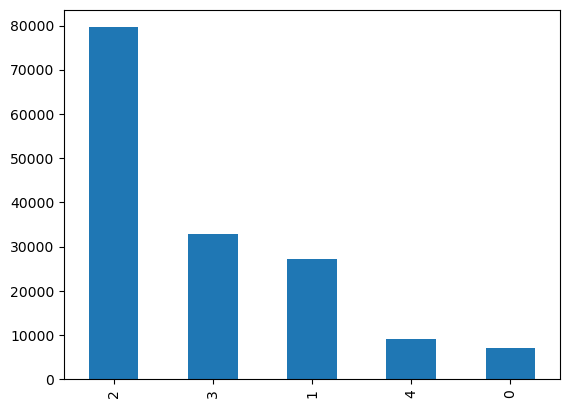

In [14]:
df['Sentiment'].value_counts().plot(kind ='bar')

0-negative
1-somewhat negative
2-neutral
3-somewhat positive
4-positive

In [15]:
seq_len = 512
num_samples = len(df)

num_samples,seq_len

(156060, 512)

In [16]:
from transformers import BertTokenizer

In [17]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [20]:
tokens = tokenizer(df['Phrase'].tolist(), max_length = seq_len,
                  truncation = True,padding='max_length',
                  add_special_tokens= True,
                  return_tensors ='np')

In [22]:
tokens.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [24]:
tokens['input_ids']

array([[  101,   138,  1326, ...,     0,     0,     0],
       [  101,   138,  1326, ...,     0,     0,     0],
       [  101,   138,  1326, ...,     0,     0,     0],
       ...,
       [  101,   170, 25247, ...,     0,     0,     0],
       [  101,   170, 25247, ...,     0,     0,     0],
       [  101, 22572, 12148, ...,     0,     0,     0]])

In [25]:
tokens['attention_mask']

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [41]:
import numpy as np
with open('movie-xids.npy','wb') as f:
    np.save(f,tokens['input_ids'])
with open('movie-xmasks.npy','wb') as f:
    np.save(f,tokens['attention_mask'])

In [30]:
arr = df['Sentiment'].values


In [31]:
arr.shape

(156060,)

In [32]:
arr

array([1, 2, 2, ..., 3, 2, 2])

In [33]:
arr.max()+1

5

In [34]:
labels = np.zeros((num_samples, arr.max()+1))
labels.shape

(156060, 5)

In [36]:
labels[np.arange(num_samples), arr] = 1

In [38]:
labels

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

with this we have out one hot encoding and now we save this as np
binary file

In [39]:
with open('movie-labels.npy','wb') as f:
    np.save(f, labels)